In [1]:
import simpy
import numpy as np

In [2]:
def generate_request():
    return np.random.exponential(1./2) 

def generate_ride():
    return np.random.exponential(1./3) 

In [3]:
def run_env(env, drivers):
    i=0
    while True:
        i+=1
        yield env.timeout(generate_request())
        env.process(rider(env, i, drivers))

In [4]:
def rider(env, rider, drivers):
    with drivers.request() as request:
        t_arrival = env.now
        print(env.now, 'passenger {} arrives'.format(rider))
        yield request
        print(env.now, 'passenger {} is being served'.format(rider))
        yield env.timeout(generate_ride())
        print(env.now, 'passenger {} served !!'.format(rider))
        t_depart = env.now
        wait_time.append(t_depart - t_arrival)

In [5]:
def metric(env, drivers):
    while True:
        obs_time.append(env.now)
        q_length.append(len(drivers.queue))
        yield env.timeout(0.5)

In [6]:
wait_time, obs_time, q_length = [], [], []

In [7]:
np.random.seed(23)

In [10]:
env = simpy.Environment()
drivers = simpy.Resource(env, capacity=1)

In [11]:
env.process(run_env(env, drivers))
env.process(metric(env, drivers))

<Process(metric) object at 0x7ffd1bf78070>

In [12]:
env.run(until=200)

0.3641777761661605 passenger 1 arrives
0.3641777761661605 passenger 1 is being served
0.8475538108657428 passenger 1 served !!
1.8325567890865329 passenger 2 arrives
1.8325567890865329 passenger 2 is being served
1.9158242782505415 passenger 2 served !!
1.9984753774271224 passenger 3 arrives
1.9984753774271224 passenger 3 is being served
2.05943829787516 passenger 3 served !!
2.5780102879967086 passenger 4 arrives
2.5780102879967086 passenger 4 is being served
2.827164489418884 passenger 5 arrives
2.898834192816339 passenger 4 served !!
2.898834192816339 passenger 5 is being served
2.8996568341569087 passenger 5 served !!
3.092619215346522 passenger 6 arrives
3.092619215346522 passenger 6 is being served
3.8134082375499707 passenger 6 served !!
4.169840495651549 passenger 7 arrives
4.169840495651549 passenger 7 is being served
4.348470688551512 passenger 8 arrives
4.466700094994393 passenger 7 served !!
4.466700094994393 passenger 8 is being served
5.088345311452413 passenger 8 served 

109.46273792799877 passenger 237 is being served
109.82230534683703 passenger 237 served !!
110.1964628466213 passenger 238 arrives
110.1964628466213 passenger 238 is being served
110.32225868184774 passenger 238 served !!
110.98587006555684 passenger 239 arrives
110.98587006555684 passenger 239 is being served
111.24312265061398 passenger 239 served !!
111.66209702836947 passenger 240 arrives
111.66209702836947 passenger 240 is being served
111.82560339473724 passenger 241 arrives
111.91020773701726 passenger 240 served !!
111.91020773701726 passenger 241 is being served
112.4574931298324 passenger 241 served !!
113.20570065890591 passenger 242 arrives
113.20570065890591 passenger 242 is being served
113.23039292740353 passenger 243 arrives
113.2373109217415 passenger 244 arrives
113.25368109440069 passenger 242 served !!
113.25368109440069 passenger 243 is being served
113.31311673321594 passenger 243 served !!
113.31311673321594 passenger 244 is being served
113.33705884477166 passe

191.48923864461398 passenger 403 served !!
191.50920524807717 passenger 404 arrives
191.50920524807717 passenger 404 is being served
191.5793392527544 passenger 405 arrives
191.747170984668 passenger 406 arrives
192.68372231619824 passenger 404 served !!
192.68372231619824 passenger 405 is being served
192.87062365040725 passenger 405 served !!
192.87062365040725 passenger 406 is being served
193.52998299293483 passenger 406 served !!
194.34486555562845 passenger 407 arrives
194.34486555562845 passenger 407 is being served
194.36396305843664 passenger 408 arrives
194.39267925434467 passenger 409 arrives
194.59092916674575 passenger 407 served !!
194.59092916674575 passenger 408 is being served
194.82349374021888 passenger 408 served !!
194.82349374021888 passenger 409 is being served
194.83466052390037 passenger 409 served !!
195.69163271047069 passenger 410 arrives
195.69163271047069 passenger 410 is being served
196.17973957456894 passenger 410 served !!
196.51640814242575 passenger 

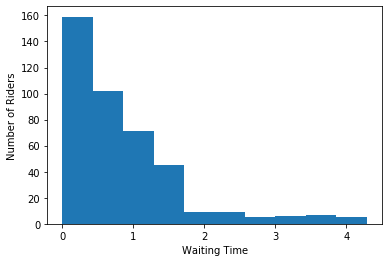

In [13]:
import matplotlib.pyplot as plt

plt.hist(wait_time)
plt.xlabel('Waiting Time')
plt.ylabel('Number of Riders');

In [14]:
obs_time

[0,
 0.5,
 1.0,
 1.5,
 2.0,
 2.5,
 3.0,
 3.5,
 4.0,
 4.5,
 5.0,
 5.5,
 6.0,
 6.5,
 7.0,
 7.5,
 8.0,
 8.5,
 9.0,
 9.5,
 10.0,
 10.5,
 11.0,
 11.5,
 12.0,
 12.5,
 13.0,
 13.5,
 14.0,
 14.5,
 15.0,
 15.5,
 16.0,
 16.5,
 17.0,
 17.5,
 18.0,
 18.5,
 19.0,
 19.5,
 20.0,
 20.5,
 21.0,
 21.5,
 22.0,
 22.5,
 23.0,
 23.5,
 24.0,
 24.5,
 25.0,
 25.5,
 26.0,
 26.5,
 27.0,
 27.5,
 28.0,
 28.5,
 29.0,
 29.5,
 30.0,
 30.5,
 31.0,
 31.5,
 32.0,
 32.5,
 33.0,
 33.5,
 34.0,
 34.5,
 35.0,
 35.5,
 36.0,
 36.5,
 37.0,
 37.5,
 38.0,
 38.5,
 39.0,
 39.5,
 40.0,
 40.5,
 41.0,
 41.5,
 42.0,
 42.5,
 43.0,
 43.5,
 44.0,
 44.5,
 45.0,
 45.5,
 46.0,
 46.5,
 47.0,
 47.5,
 48.0,
 48.5,
 49.0,
 49.5,
 50.0,
 50.5,
 51.0,
 51.5,
 52.0,
 52.5,
 53.0,
 53.5,
 54.0,
 54.5,
 55.0,
 55.5,
 56.0,
 56.5,
 57.0,
 57.5,
 58.0,
 58.5,
 59.0,
 59.5,
 60.0,
 60.5,
 61.0,
 61.5,
 62.0,
 62.5,
 63.0,
 63.5,
 64.0,
 64.5,
 65.0,
 65.5,
 66.0,
 66.5,
 67.0,
 67.5,
 68.0,
 68.5,
 69.0,
 69.5,
 70.0,
 70.5,
 71.0,
 71.5,
 72.0,
 72.5,


In [15]:
q_length

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 4,
 4,
 5,
 5,
 7,
 8,
 8,
 9,
 8,
 8,
 8,
 9,
 7,
 6,
 3,
 2,
 3,
 3,
 2,
 1,
 0,
 0,
 0,
 1,
 3,
 1,
 3,
 1,
 2,
 2,
 3,
 6,
 6,
 4,
 5,
 2,
 0,
 0,
 0,
 1,
 3,
 1,
 3,
 7,
 7,
 8,
 7,
 8,
 9,
 7,
 6,
 6,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 3,
 5,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 2,
 3,
 2,
 0,
 0,
 1,
 4,
 3,
 3,
 2,
 2,
 0,
 0,
 1,
 6,
 6,
 4,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 3,
 4,
 5,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 5,
 4,
 3,
 0,
 0,
 0,
 0,


Text(0, 0.5, 'Queue Length')

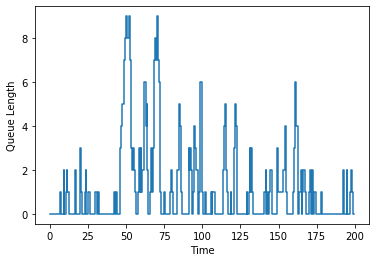

In [16]:
plt.figure()
plt.step(obs_time, q_length, where='post')
plt.xlabel('Time')
plt.ylabel('Queue Length')